https://www2.deloitte.com/us/en/insights/industry/technology/future-of-the-movie-industry.html

### Potential advantages or disadvantages for studios

1. theatres vs streaming directly
2. First 17 days of box office are crucial
3. longer a movie runs in theatres the more venues make and less that studios make
4. License fees are dependent on box office revenue
5. tv deals are are a potential additional source but require min box office revenue
6. Studios are relucatant to join digital services becuase of adverse affect on existing agreements(distribution, etc.)

https://www.rklesolutions.com/hubfs/RKL_eSolutions_Entertainment_eBook.pdf

1. Automate business processes to increase productivity
2. Empower teams with visibility into performance
3. Connect data across best-in-class applications 
4. Remove the distractions of IT
5. Work with a partner who knows your industry

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

In [28]:
# imdb_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
# imdb_movie_basics.head()

In [29]:
# imdb_movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
# imdb_movie_ratings.head()

In [9]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
bom_movie_gross.year.head()

0    2010
1    2010
2    2010
3    2010
4    2010
Name: year, dtype: int64

In [11]:
rt_movies_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
rt_movies_info.dropna(inplace = True)

In [13]:
rt_movies_info['theater_date'].head()

1     Aug 17, 2012
6     Jan 11, 2002
7     Apr 27, 2006
15    Dec 17, 2010
18    Dec 25, 2013
Name: theater_date, dtype: object

In [14]:
rt_movies_info['year'] = rt_movies_info.theater_date
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"Aug 17, 2012"
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,"Jan 11, 2002"
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,"Apr 27, 2006"
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,"Dec 17, 2010"
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures,"Dec 25, 2013"


In [15]:
rt_movies_info.year = rt_movies_info.year.map(lambda x: x[-4:])

In [16]:
rt_movies_info.year = rt_movies_info.year.astype('int64')

In [17]:
rt_movies_info.year.head()

1     2012
6     2002
7     2006
15    2010
18    2013
Name: year, dtype: int64

# Merge the Tables by Year

In [38]:
merge_df = rt_movies_info.merge(bom_movie_gross, how = 'outer', left_on = 'year', right_on = 'year')

In [39]:
merge_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio_x,year,title,studio_y,domestic_gross,foreign_gross
0,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012,Marvel's The Avengers,BV,623400000.0,895500000
1,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012,Skyfall,Sony,304400000.0,804200000
2,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012,The Dark Knight Rises,WB,448100000.0,636800000
3,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012,The Hobbit: An Unexpected Journey,WB (NL),303000000.0,718100000
4,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012,Ice Age: Continental Drift,Fox,161300000.0,715900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,The Quake,Magn.,6200.0,NaN
38178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Edward II (2018 re-release),FM,4800.0,NaN
38179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,El Pacto,Sony,2500.0,NaN
38180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,The Swan,Synergetic,2400.0,NaN


In [19]:
rt_movies_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,2002
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,2006
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,2010
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox,2011
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films,2016
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures,2005
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment,2012


In [48]:
rt_movies_info.studio.value_counts()

Universal Pictures       23
Paramount Pictures       15
20th Century Fox         12
Sony Pictures            12
Warner Bros. Pictures    11
                         ..
Universal                 1
USA Films                 1
Independent Pictures      1
Apparition Films          1
Screen Gems               1
Name: studio, Length: 101, dtype: int64

In [30]:
rt_movies_info.studio.unique()

array(['Entertainment One', 'Paramount Pictures',
       'Sony Pictures Classics', 'ATO Pictures', 'Universal Pictures',
       'MGM', 'Lions Gate Films', 'New Line Cinema',
       'Samuel Goldwyn Films', 'Open Road Films', 'Roadside Attractions',
       'Buena Vista Distribution Compa', 'Paramount Studios',
       '20th Century Fox', 'Fine Line Features', 'Warner Bros. Pictures',
       'Columbia Pictures', 'Dreamworks Pictures', 'Film District',
       'Reliance Entertainment', 'WARNER BROTHERS PICTURES',
       'DreamWorks SKG', 'Focus Features', 'IFC Films',
       'The Weinstein Company', 'Lions Gate Films Inc.',
       'Lionsgate Films', 'Magnolia Pictures', 'Sony Pictures',
       'Sony Classics', 'Wrekin Hill Entertainment', 'Weinstein Company',
       'Sony Pictures/TriStar Pictures', 'Aspiration Media',
       'Variance Films', 'MGM/UA', 'Film Foundry Releasing',
       'Walt Disney Pictures', 'Fox Searchlight Pictures', 'CBS Films',
       'Echolight Studios', 'Lionsgate/Roa

In [22]:
rt_movies_info.year.value_counts()

2010    18
2004    18
2007    17
2006    17
2013    16
2009    16
2012    15
2011    14
2005    14
2003    14
2002    14
2016    11
2008    10
2001     9
2015     9
2014     9
2017     7
2000     5
1993     1
1974     1
Name: year, dtype: int64

In [23]:
#line chart of most movies developed by studio each year

In [62]:
pd.Series(rt_movies_info['studio'].value_counts()).index[0:10].tolist()

['Universal Pictures',
 'Paramount Pictures',
 '20th Century Fox',
 'Sony Pictures',
 'Warner Bros. Pictures',
 'Sony Pictures Classics',
 'IFC Films',
 'New Line Cinema',
 'Lionsgate Films',
 'Columbia Pictures']

In [63]:
top_10 = pd.Series(rt_movies_info['studio'].value_counts()).index[0:10].tolist()

In [65]:
sns.lineplot(x=rt_movies_info.year, y=top_10)
plt.title('Most Movies Developed by Studio each Year')
plt.xlabel('Year')
plt.ylabel('Studio')
plt.show()

ValueError: array length 10 does not match index length 235

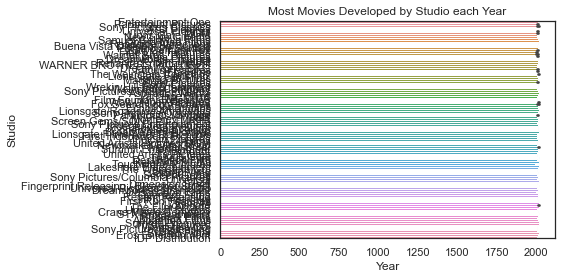

In [52]:
sns.barplot(x=rt_movies_info.year, y=rt_movies_info.studio)
plt.title('Most Movies Developed by Studio each Year')
plt.xlabel('Year')
plt.ylabel('Studio')
plt.show()

In [43]:
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,2012
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures,2002
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics,2006
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures,2010
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures,2013


In [26]:
# total box office revenue by each studio

In [35]:
#drop commas for box_office

rt_movies_info['box_office'].dtypes


rt_movies_info['box_office'] = rt_movies_info['box_office'].str.replace(',', '')
rt_movies_info['box_office']

rt_movies_info['box_office'] = pd.to_numeric(rt_movies_info['box_office'])

In [36]:
rt_movies_info['box_office']

1         600000
6       41032915
7         224114
15       1039869
18      20518224
          ...   
1530    72700000
1537     1320005
1541    25335935
1542     1416189
1545       59371
Name: box_office, Length: 235, dtype: int64

In [ ]:
# create new df to plot
# brs_1 = pd.rt_movies_info().assign(Box_Office=df['box_office'], Studio=df['studio'])
# print(brs_1)

In [49]:
# #set seaborn plotting aesthetics
# sns.set(style='white')
# #create stacked bar chart
# rt_movies_info.set_index(['year']).plot(kind='bar', stacked=True, color=['steelblue', 'red'])

# #add overall title
# plt.title('Box Office Revenue by Studio', fontsize=16)

# #add axis titles
# plt.xlabel('Studio')
# plt.ylabel('Box Office Revenue')

# #rotate x-axis labels
# plt.xticks(rotation=45)

In [ ]:
#top studios that performed domestic and foreign
#join table with 